In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import cv2

In [3]:
dir_images = "F:/ml_datasets/RUG/pattern_recognition/assignment_2/BigCats/Tiger/"

In [4]:
list_images = sorted(os.listdir(dir_images))

In [5]:
idx_image = 8

In [6]:
img = cv2.cvtColor(cv2.imread(os.path.join(dir_images, list_images[idx_image])), cv2.COLOR_BGR2GRAY)

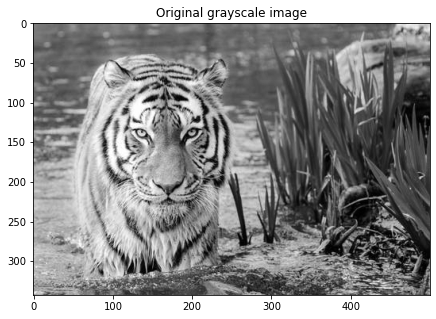

In [7]:
fig = plt.figure(figsize=(8, 5))
plt.title("Original grayscale image")
plt.imshow(img, cmap="gray")

In [8]:
img.shape

(343, 500)

## 1. FFT feature visualizer

In [9]:
from image_features import FastFourierTransformFeatureExtractor

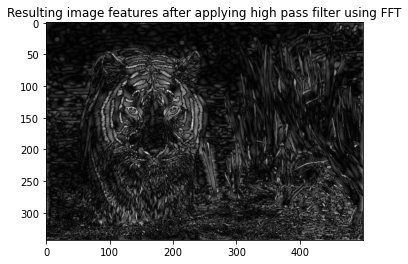

In [10]:
fft_feat_extractor = FastFourierTransformFeatureExtractor(radius=20, target_dim=(None, None))
img_feats = fft_feat_extractor.get_features_using_fft(img)
fig = plt.figure()
plt.title("Resulting image features after applying high pass filter using FFT")
plt.imshow(img_feats.astype(np.float32), cmap="gray")

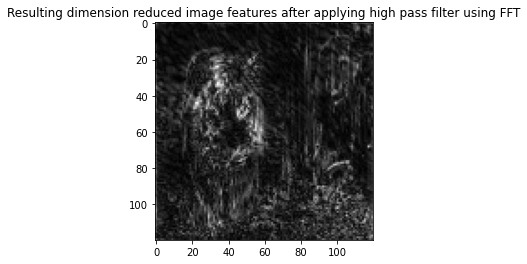

In [11]:
fft_feat_extractor_red = FastFourierTransformFeatureExtractor(radius=20, target_dim=(120, 120))
img_feats_red = fft_feat_extractor_red.get_features_using_fft(img)
fig = plt.figure()
plt.title("Resulting dimension reduced image features after applying high pass filter using FFT")
plt.imshow(img_feats_red.astype(np.float32), cmap="gray")

In [12]:
img_mag_spec = fft_feat_extractor.img_magnitude_spectrum
feats_mag_spec = fft_feat_extractor.feats_magnitude_spectrum

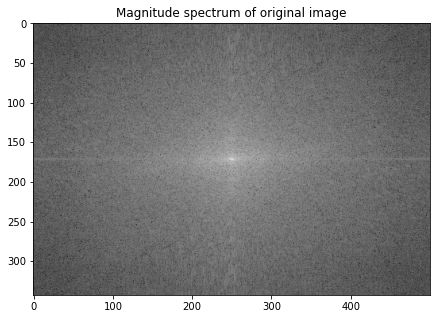

In [13]:
fig = plt.figure(figsize=(8, 5))
plt.title("Magnitude spectrum of original image")
plt.imshow(img_mag_spec, cmap="gray")

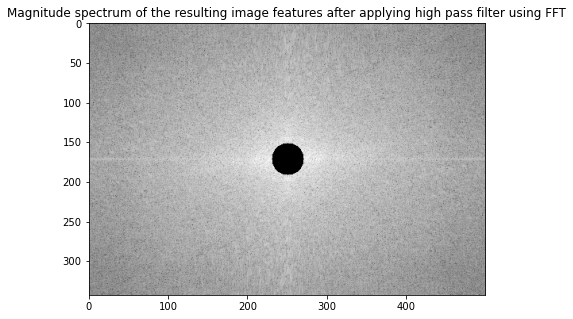

In [14]:
fig = plt.figure(figsize=(8, 5))
plt.title("Magnitude spectrum of the resulting image features after applying high pass filter using FFT")
plt.imshow(feats_mag_spec, cmap="gray")

## 2. SIFT keypoints visualizer

In [15]:
sift_detector = cv2.SIFT_create()

In [16]:
key_points = sift_detector.detect(img, None)

In [17]:
img_keypoints = cv2.drawKeypoints(img, key_points, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

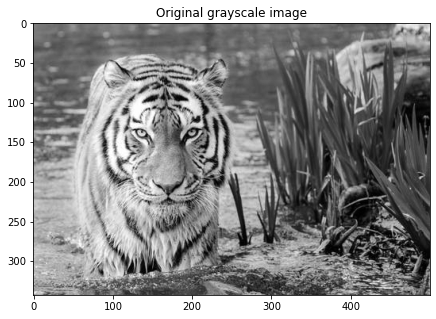

In [18]:
fig = plt.figure(figsize=(8, 5))
plt.title("Original grayscale image")
plt.imshow(img, cmap="gray")

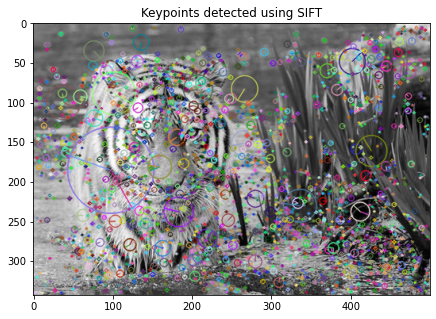

In [19]:
fig = plt.figure(figsize=(8, 5))
plt.title("Keypoints detected using SIFT")
plt.imshow(img_keypoints, cmap="gray")